## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [4]:
# All required libraries are imported here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import metrics

## Exploratory data analysis

In [12]:
!pip install imblearn

In [9]:
# Read the data set and explore
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Here we will observe the distribution of our classes

In [14]:
#observe the different feature type present in the data

df.shape

(284807, 31)

Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

In [15]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [16]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

### Now we will see distribution of data.

In [17]:
from collections import Counter
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


We can see that data is highly imbalanced as the ratio of Non Fraud to Fraud case is extremely high. As only 492 are fraud case and 284315 is non fraud case

In [18]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

## Graphical represention to understand in more depth

### Bar Chart to understand ratio od non Fraud to fraud case

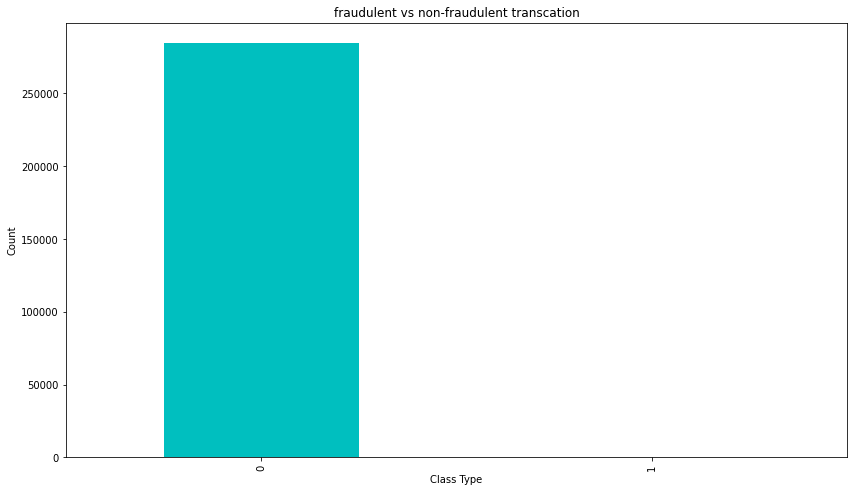

In [19]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

ax = df['Class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="fraudulent vs non-fraudulent transcation", color= 'c')
ax.set_xlabel("Class Type")
ax.set_ylabel("Count")
plt.show()

### Scatter plot to observe the distribution of classes with time

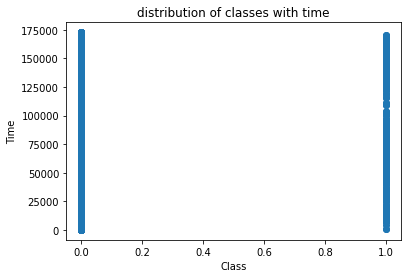

In [20]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df.Class, df.Time, cmap='viridis')
plt.xlabel("Class")
plt.ylabel("Time")
plt.title("distribution of classes with time")
plt.show()

### Scatter plot to observe the distribution of classes with Amount


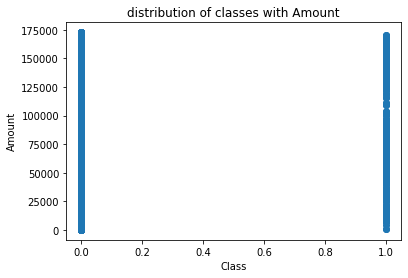

In [21]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df.Class, df.Time, cmap='viridis')
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title("distribution of classes with Amount")
plt.show()

### Plot to understand correlation of dependent(target) variable with other independent variable

<AxesSubplot:title={'center':'Correlation with class'}>

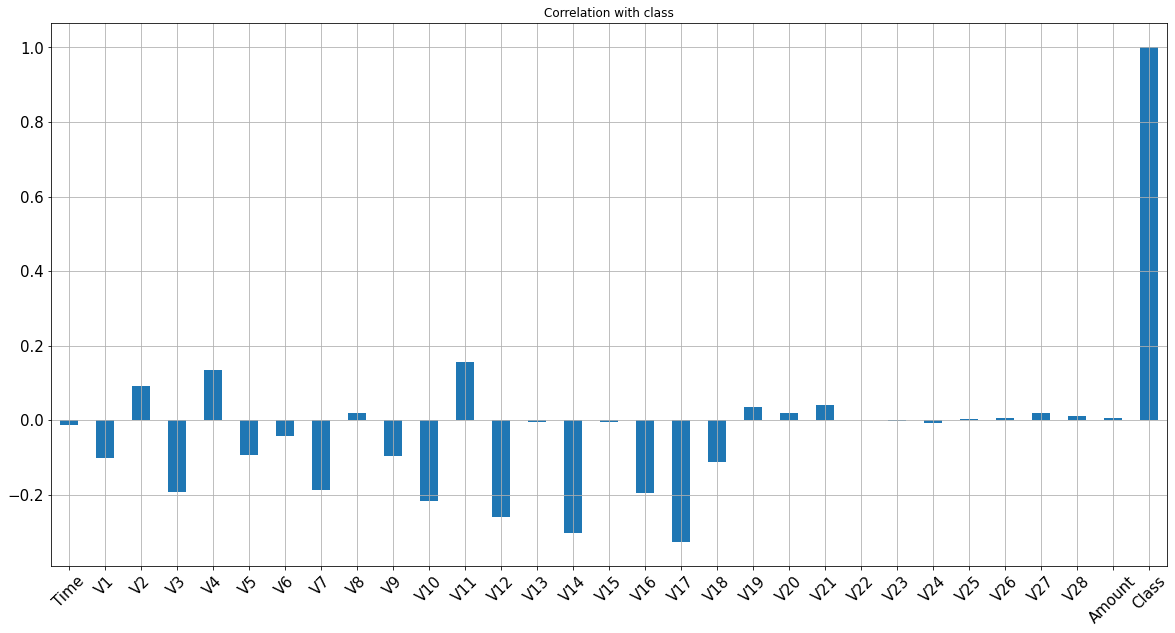

In [22]:
df.corrwith(df.Class).plot.bar(figsize = (20, 10), title = "Correlation with class", fontsize = 15,rot = 45, grid = True)

From graph we can see that **V17, V14, V12 and v10 ** are highly corelated and are negatively correlated

In [23]:
## Correlation Matrix
# Compute the correlation matrix
corr = df.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447


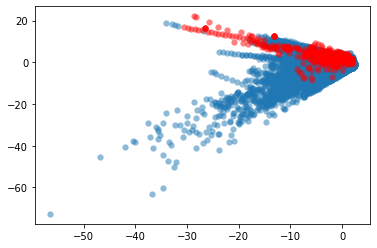

In [24]:
# Plot how fraud and non-fraud cases are scattered 
plt.scatter(df.loc[df['Class'] == 0]['V1'], df.loc[df['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.loc[df['Class'] == 1]['V1'], df.loc[df['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()

Distribution of class 1 (Fraud case) is represented by red dots  and class 0 (Non Fraud case)is represented by blue dots

### Observe statistical difference between Fraud and Non Fraud cases

In [25]:
# Seperate total data into non-fraud and fraud cases
df_nonfraud = df[df.Class == 0] #save non-fraud df observations into a separate df
df_fraud = df[df.Class == 1] #do the same for frauds

In [26]:
# Summarize statistics and see differences between fraud and normal transactions
print(df_nonfraud.Amount.describe())
print('_'*25)
print(df_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
_________________________
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


### Summary:
The mean transaction amout among fraud cases is 122 USD, and is 88 among non-fraud cases. And the difference is statistically significant.

### Distribution of Fraud cases vs Non Fraud in case of high amount transactions

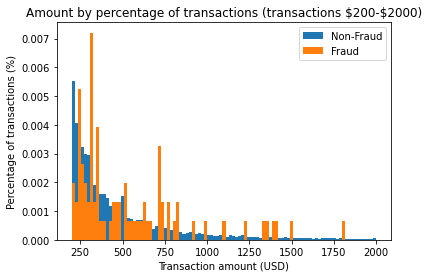

In [27]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

### Summary:
In the long tail, fraud transaction happened more frequently.
It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.

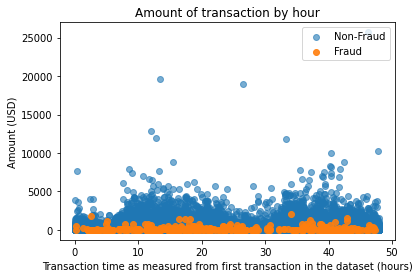

In [28]:
plt.scatter((df_nonfraud.Time/(60*60)), df_nonfraud.Amount, alpha=0.6, label='Non-Fraud')
plt.scatter((df_fraud.Time/(60*60)), df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

It is not enough to make a good classifier.
For example, it would be hard to draw a line that cleanly separates fraud and non-fraud transactions

### Distribution of Fraud and Non Fraud case with respect to Time

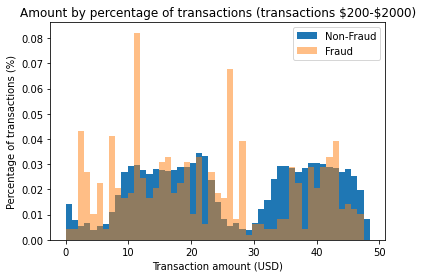

In [29]:
# Plot to find out what time of hour of the day is more susceptible for frauds to occur
bins = np.linspace(0,48.48)
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

Hour "zero" corresponds to the hour the first transaction happened and not necessarily 12-1am.
Given the heavy decrease in normal transactions from hours 1 to 8 and again roughly at hours 24 to 32, it seems fraud tends to occur at higher rates during the night.
Statistical tests could be used to give evidence for this fact.

### Distribution of Fraud and Non Fraud case with respect to different columns

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

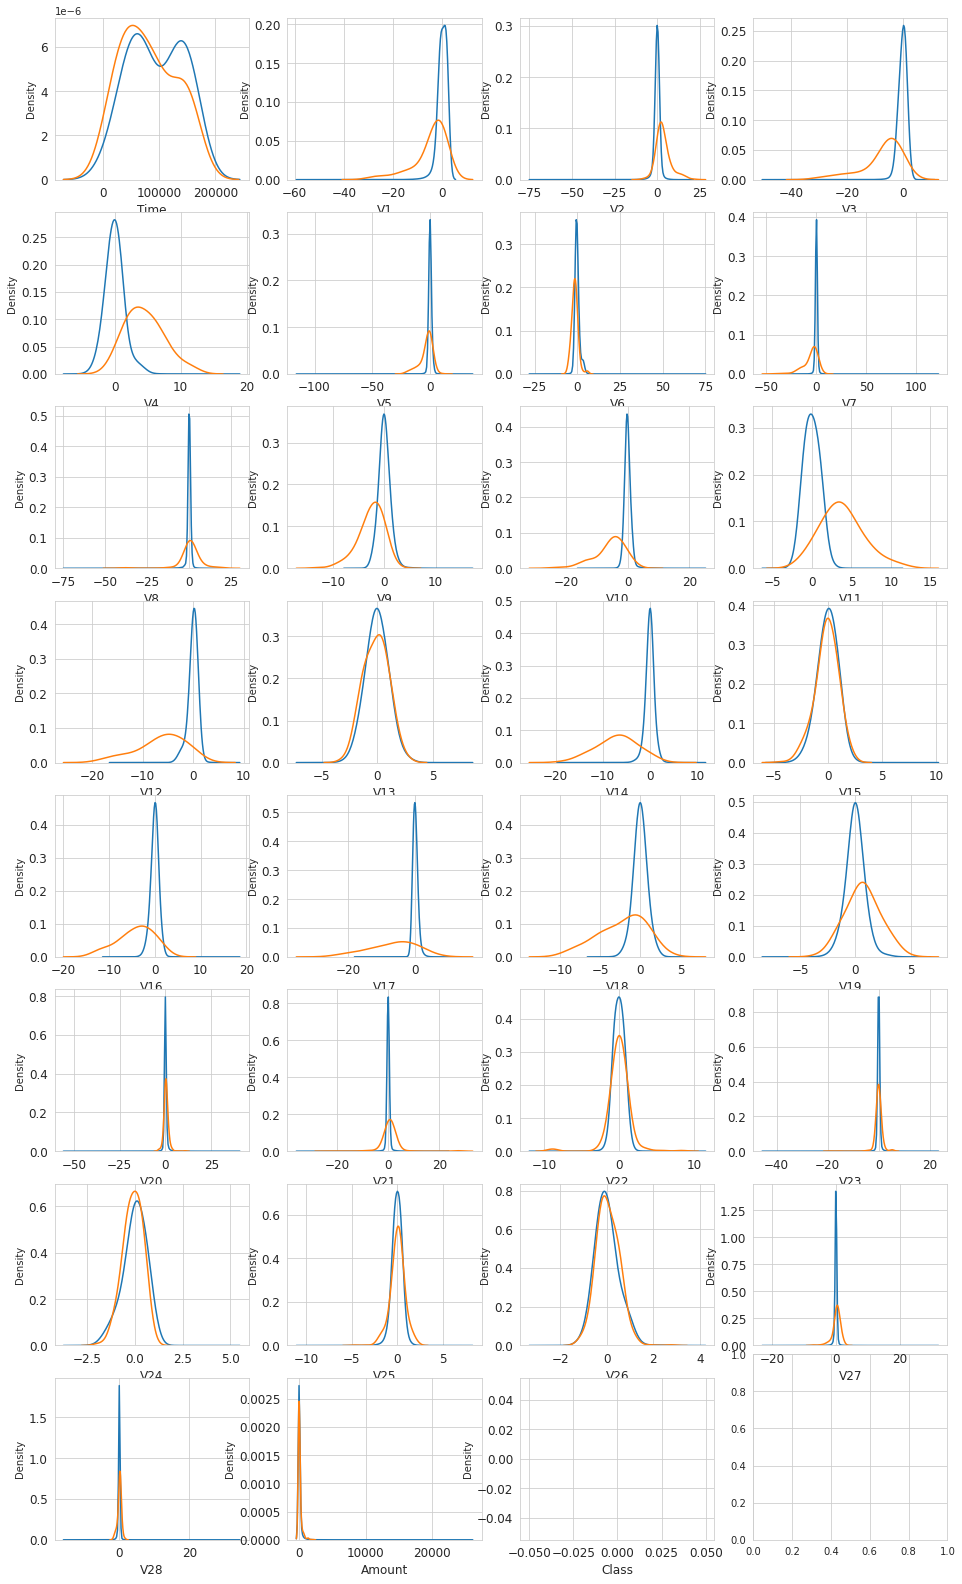

In [30]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

## Summary
* Fraud case are represented by orange and Non Fraud with Blue. 
* Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.
* V6, V13, V15, V20, V22, V23, V24, V25 and V26 have same distribution of data for Faud and Non Fraud Case.
* Distributio of data for Fraud case is distributed evenly around zero.

## Checking for null value

In [31]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Since no field have null value thus no imputation strategy required in this case.

## Heat Map

<AxesSubplot:>

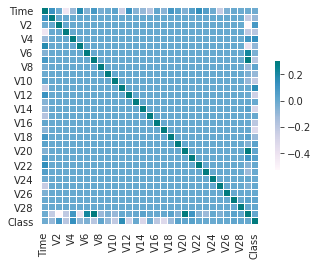

In [32]:
sns.heatmap(corr, cmap='PuBuGn', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### As you notice, the variable ‘Amount’ ranges from 0 to 25,691.16. To reduce its wide range, we use Standardization to remove the mean and scale to unit variance, so that 68% of the values lie in between (-1, 1).

### Scaling amount and time field because only these two fields are having actual value, rest all variables are PCA transformed, so scaling not required for other variables 

In [10]:

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"

df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Drop unnecessary columns
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


### Splitting the data into train & test data

In [11]:
#class variable
y = df_scaled[['Class']] 
X = df_scaled.drop(['Class'],axis=1, inplace=False) 

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [35]:
# 30% data is selected for test and rest 70 % for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [36]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

Class    492
dtype: int64
Class    345
dtype: int64
Class    147
dtype: int64


### Plotting the distribution of a variable

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 2160x2160 with 0 Axes>

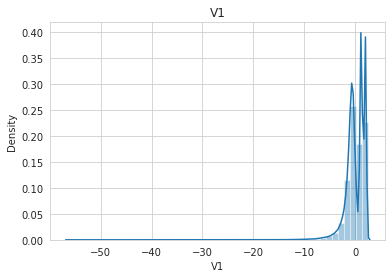

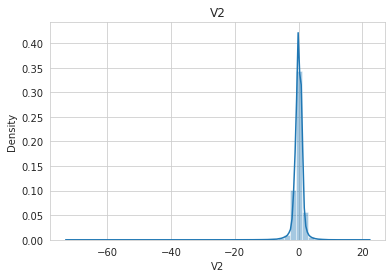

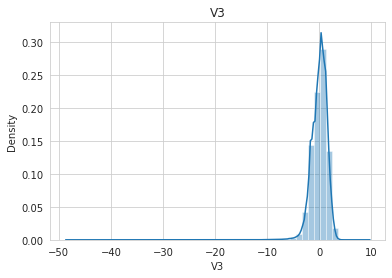

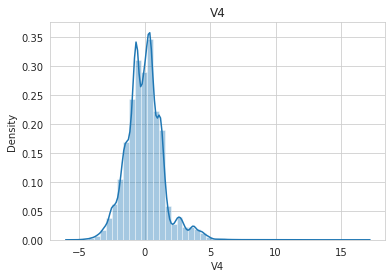

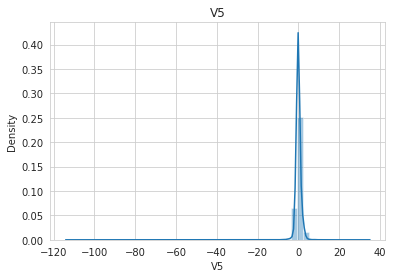

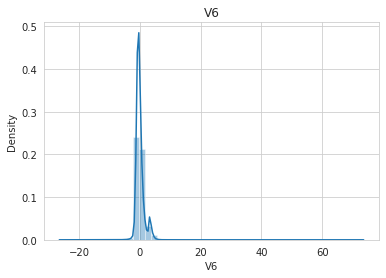

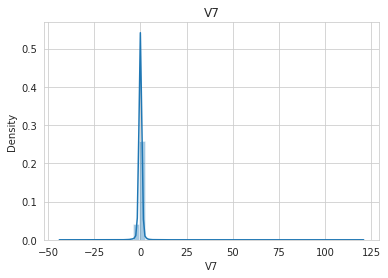

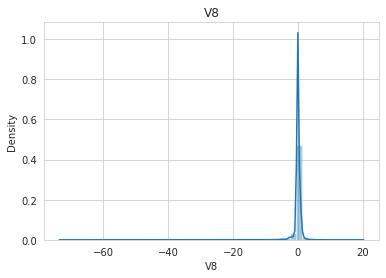

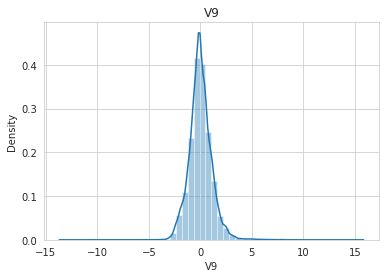

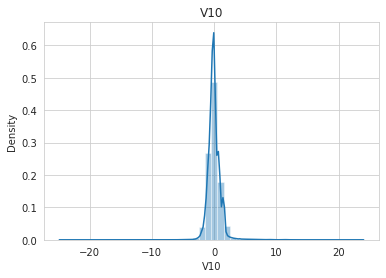

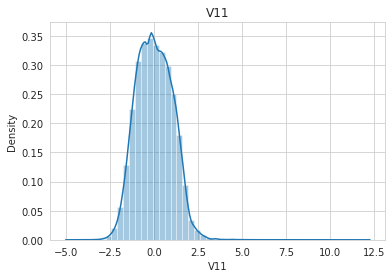

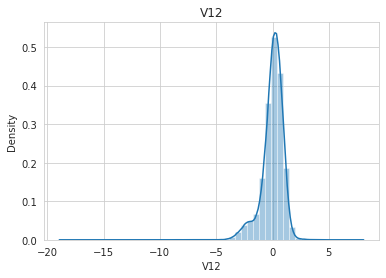

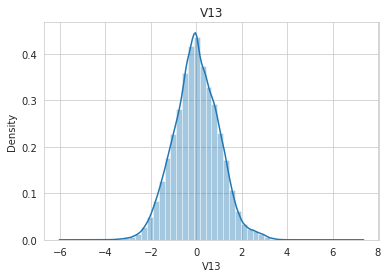

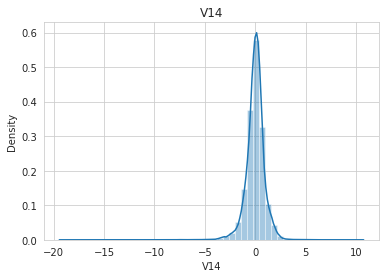

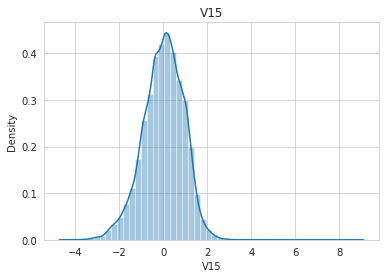

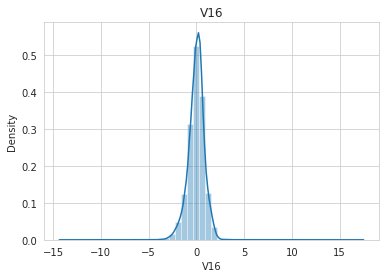

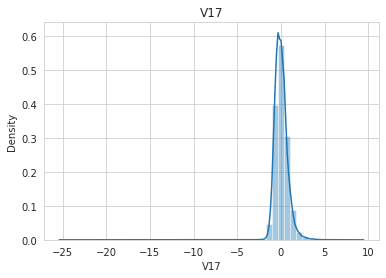

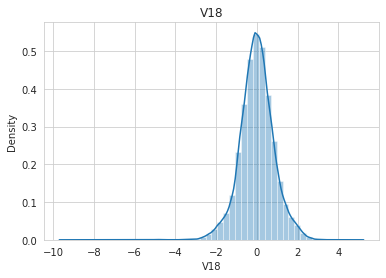

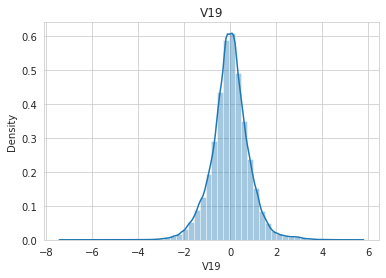

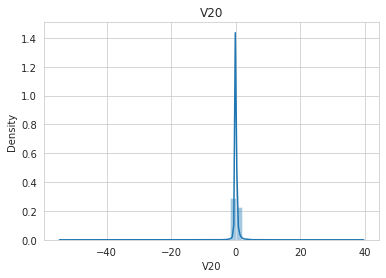

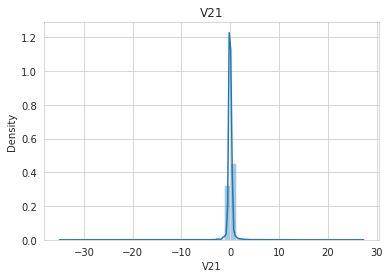

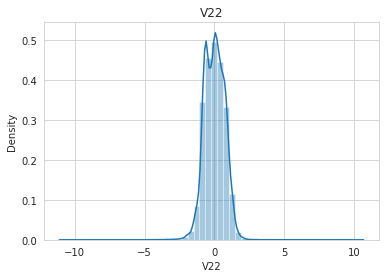

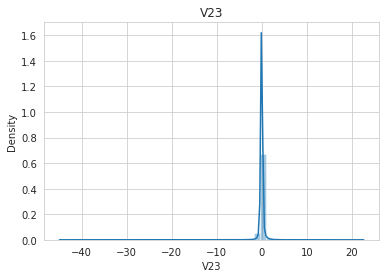

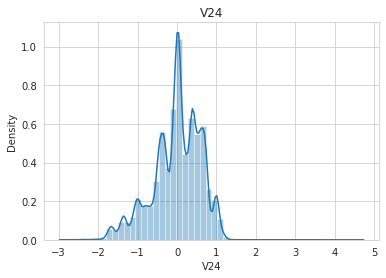

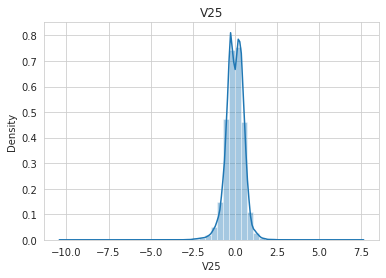

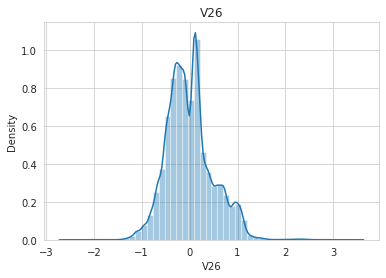

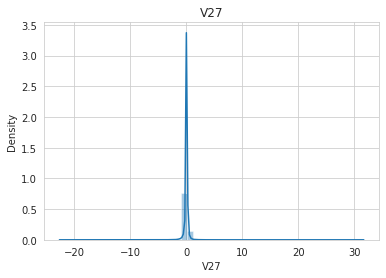

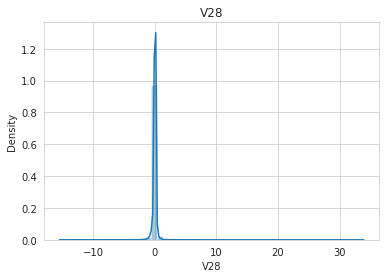

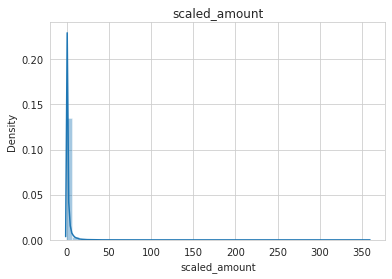

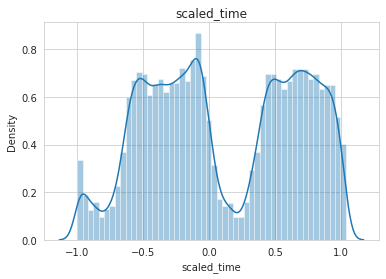

In [37]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(30,30))
for i in X.columns:
    plt.figure()
    sns.distplot(X[i])
    plt.title(i)
    


In [16]:
df.columns
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

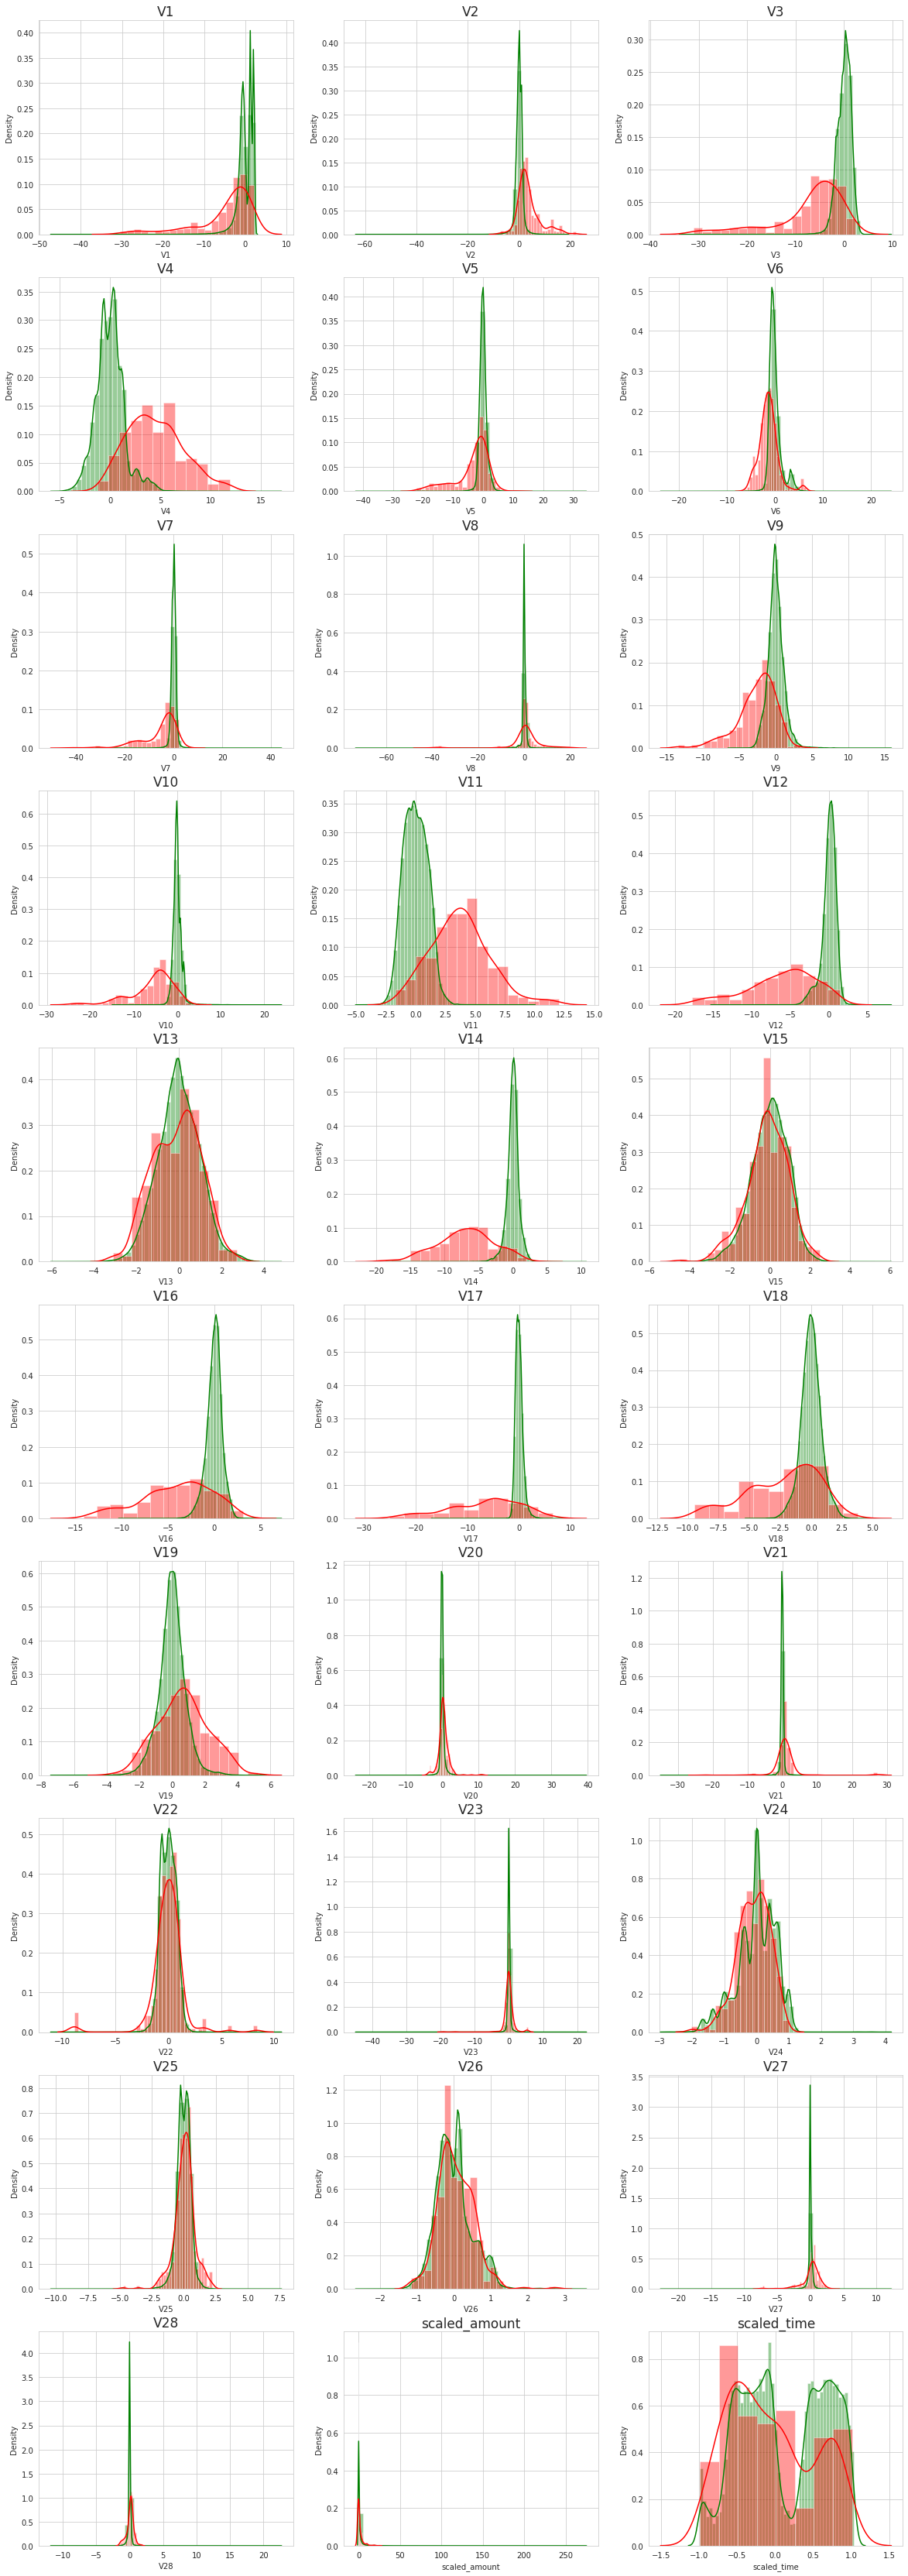

In [39]:
X_train_df = pd.DataFrame(data = X_train, columns= cols)
plt.figure(figsize = (20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_train_df[col][df.Class== 0], color = 'green')
    sns.distplot(X_train_df[col][df.Class== 1], color = 'red')
    plt.title(col, fontsize =17)
plt.show()

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

### Since there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [40]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
## We are using PowerTransformer to perform a Yeo-Johnson power transformation on our X-data
## in order to ensure that our features are normally distributed. 
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
transformer.fit(X_train)
# PowerTransformer requires a matrix/DataFrame
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

### Checking distribution of data after Power transform just to ensure if distribution is more normally distributed(Gaussian)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

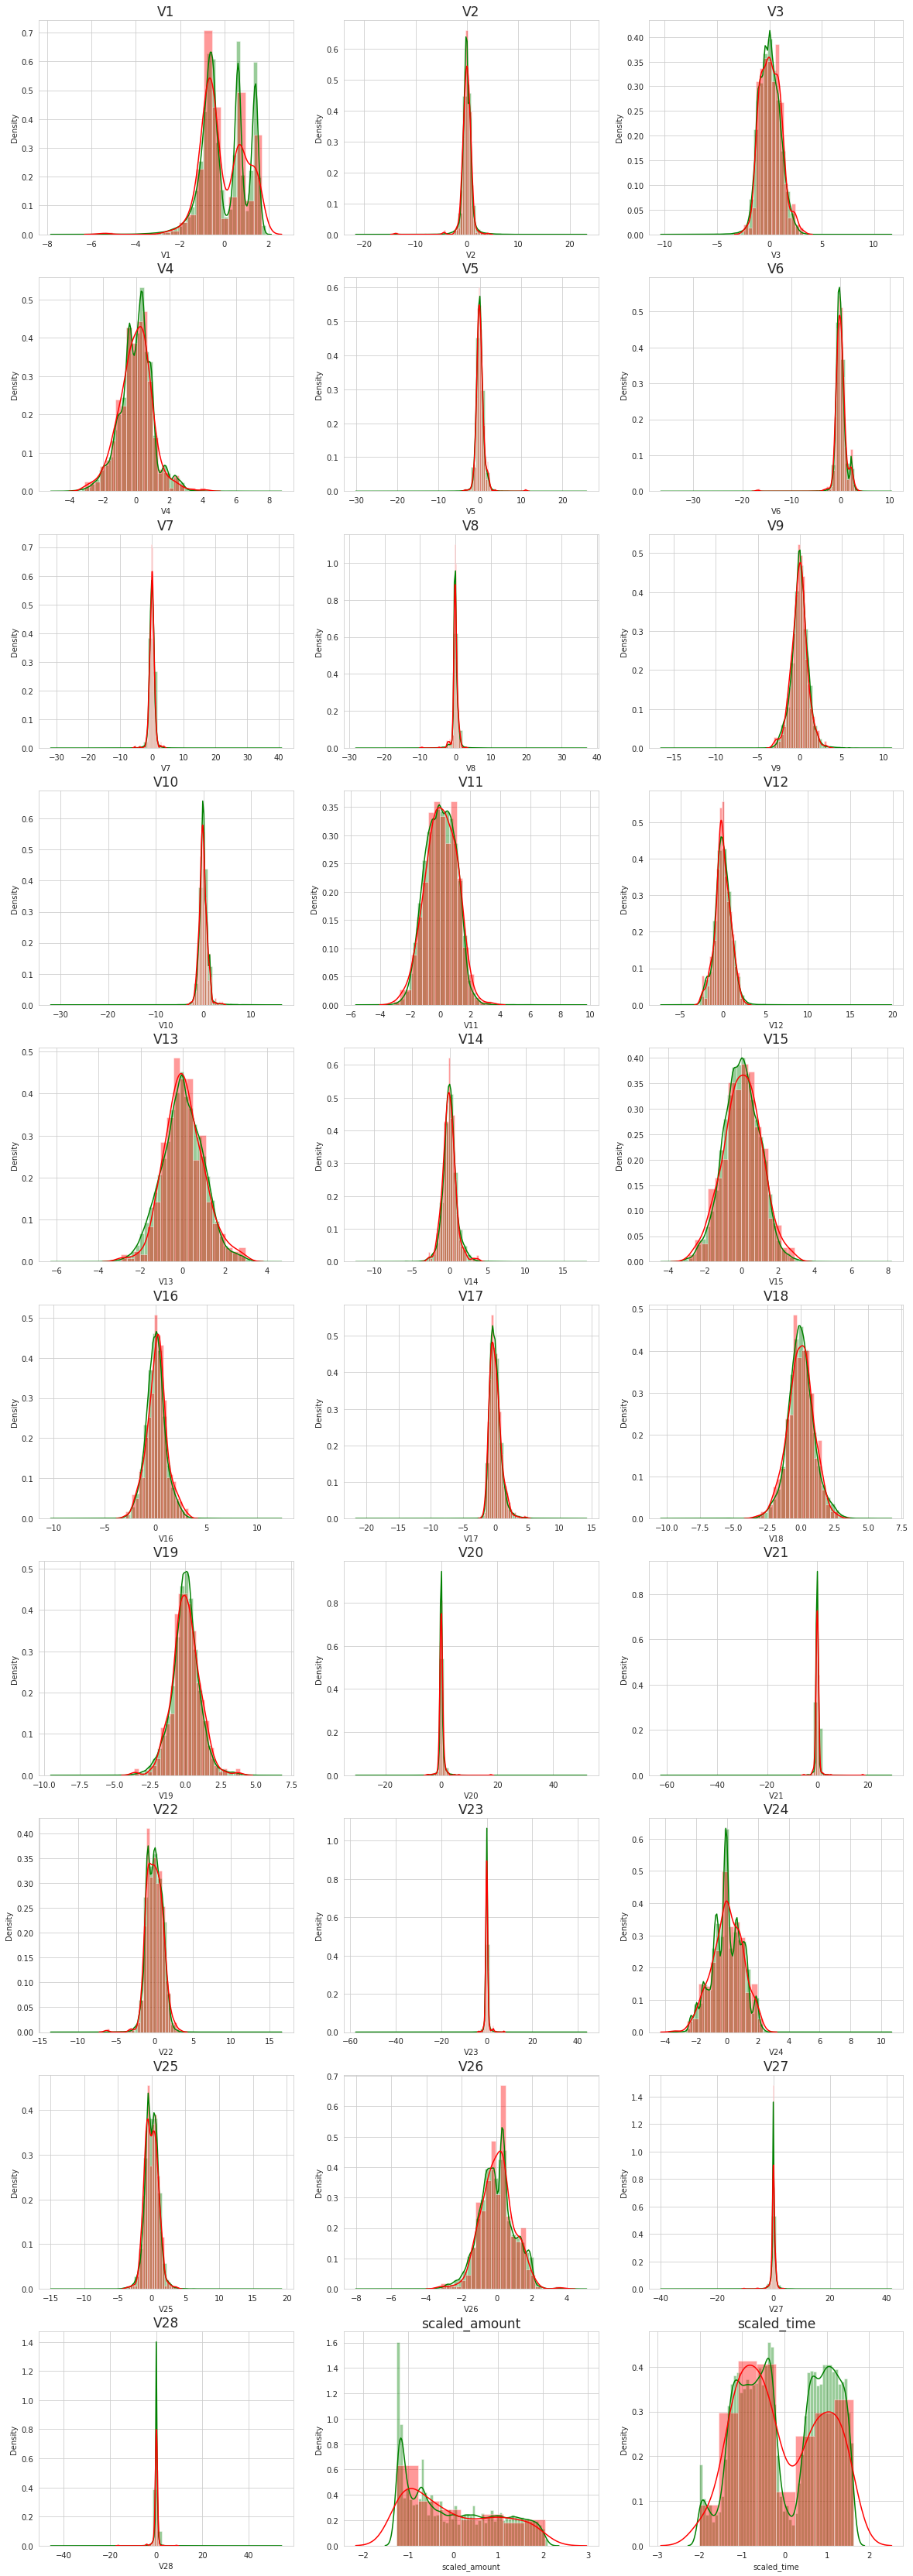

In [41]:

X_train_pt_df = pd.DataFrame(data = X_train, columns= cols)
plt.figure(figsize = (20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_train_pt_df[col][df.Class== 0], color = 'green')
    sns.distplot(X_train_pt_df[col][df.Class== 1], color = 'red')
    plt.title(col, fontsize =17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

## Model 1 : Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [38]:
# Obtain model predictions
y_predicted = lr.predict(X_test)

## Logistic Regression Model Evaluation

ROC AUC Score: 0.9781128733616875
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.61      0.73       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    11]
 [   57    90]]


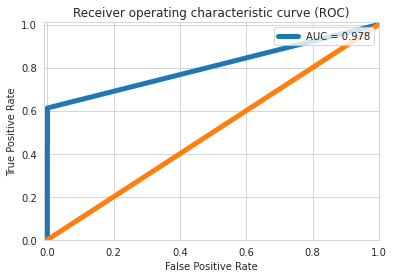

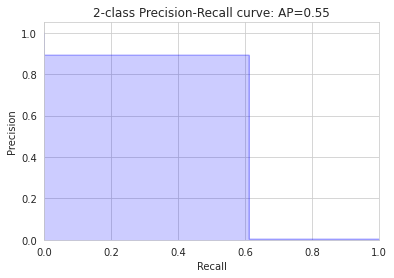

In [39]:


# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = lr.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

## Logistic Regression with Resampled data 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Create the training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Resample your training data
rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train,y_train)

# Fit a logistic regression model to our data
rus_model = LogisticRegression().fit(X_train_rus, y_train_rus)
ros_model = LogisticRegression().fit(X_train_ros, y_train_ros)
smote_model = LogisticRegression().fit(X_train_smote, y_train_smote)
adasyn_model = LogisticRegression().fit(X_train_adasyn, y_train_adasyn)

y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_adasyn = adasyn_model.predict(X_test)

print('Classifcation report:\n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_adasyn))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_adasyn))
print('*'*25)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     85296
           1       0.03      0.93      0.07       147

    accuracy                           0.95     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.95      0.97     85443

Confusion matrix:
 [[81382  3914]
 [   10   137]]
*************************
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.91      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83262  2034]
 [   13   134]]
*************************
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1    

As you can see, with the SMOTE resampling method, we can get the best f1-score 0.11 compared with other 3 reampling methods. Not in all cases does resampling necessarily lead to better results.
When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias.
Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly.

### Checking for Feature importance

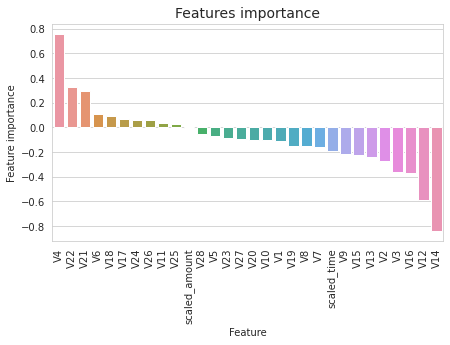

In [44]:
tmp = pd.DataFrame({'Feature': cols, 'Feature importance': lr.coef_[0]})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

plt.show()  

Feature V4, V22, V21 are highly important feature

## Model 2 : Decision Tree Classifier

In [45]:
# Import the decision tree model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create the training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

## Decision Tree Model Evaluation

ROC AUC Score: 0.8773810241598046
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.76      0.77       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85267    29]
 [   36   111]]


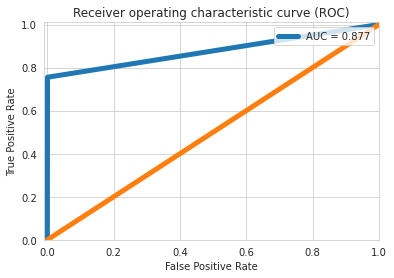

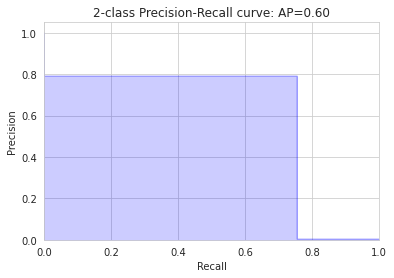

In [46]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

## Decision Tree with Resampled data

In [47]:
# Create the training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Resample your training data
rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train,y_train)

# Fit a logistic regression model to our data
rus_model = DecisionTreeClassifier().fit(X_train_rus, y_train_rus)
ros_model = DecisionTreeClassifier().fit(X_train_ros, y_train_ros)
smote_model = DecisionTreeClassifier().fit(X_train_smote, y_train_smote)
adasyn_model = DecisionTreeClassifier().fit(X_train_adasyn, y_train_adasyn)

y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_adasyn = adasyn_model.predict(X_test)


print('Classifcation report:\n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_adasyn))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_adasyn))
print('*'*25)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.89      0.03       147

    accuracy                           0.91     85443
   macro avg       0.51      0.90      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Confusion matrix:
 [[77780  7516]
 [   16   131]]
*************************
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.74      0.77       147

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85268    28]
 [   38   109]]
*************************
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1    

Oversampling is working better in this case as its F1 score is 0.55

## Decision Tree with GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    #'n_estimators': [1, 30],   
    'max_depth': [5,10], 
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [10,50]
}
clf = GridSearchCV(DecisionTreeClassifier(random_state=5),param_grid=param_grid, 
                   cv=5, scoring='recall', n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [10, 50]},
             scoring='recall')

In [49]:
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50}
0.773913043478261
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       random_state=5)


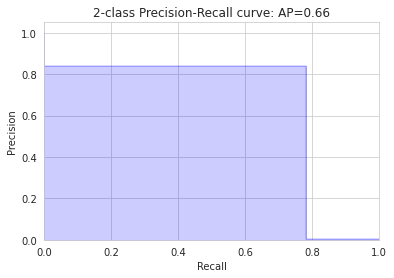

roc_auc_score: 0.9413833156597848
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.78      0.81       147

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
 [[85274    22]
 [   32   115]]


In [55]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Build a Decision Tree Classifier using the GridSearchCV parameters
dtc = DecisionTreeClassifier(
                               criterion = 'entropy',
                               min_samples_leaf = 50,
                               max_depth = 8,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
dtc.fit(X_train,y_train)
y_predicted = dtc.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the roc_auc_score,Classifcation report and Confusin matrix
probs = dtc.predict_proba(X_test)
print('roc_auc_score:', roc_auc_score(y_test,probs[:,1]))
print('Classification report:\n',classification_report(y_test,y_predicted))
print('Confusion_matrix:\n',confusion_matrix(y_test,y_predicted))

#### As we can see that with hyperparameter tuning we are able to get ROC AUC score of 94.13 in comparison to 87.7 without any hyper parameter tuning

### Checking for Feature Importance in Decision Forest

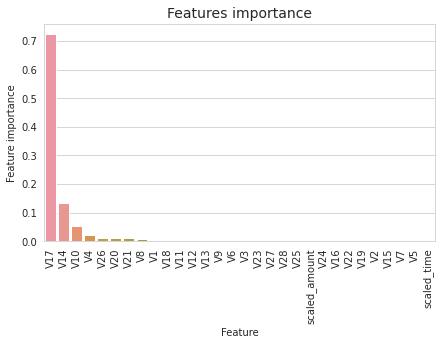

In [56]:
tmp = pd.DataFrame({'Feature': cols, 'Feature importance': dtc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

## Model 3: Random Forest

In [57]:
# Import the Random Forest Classifier model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Create the training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


## Random Forest Model Evaluation

ROC AUC Score: 0.9337907879340068
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     6]
 [   35   112]]


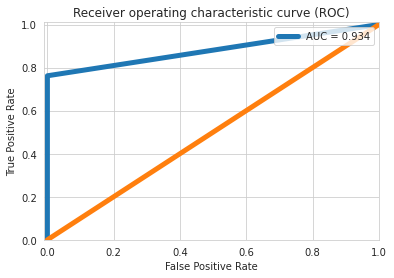

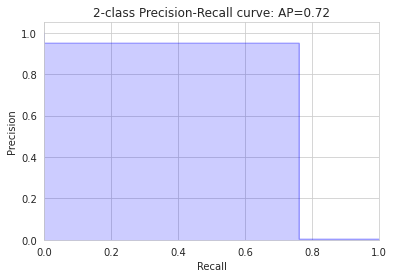

In [58]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

## Random Forest Classifier with resampled data

In [59]:
# Create the training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Resample your training data
rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train,y_train)

# Fit a logistic regression model to our data
rus_model = RandomForestClassifier(random_state=5).fit(X_train_rus, y_train_rus)
ros_model = RandomForestClassifier(random_state=5).fit(X_train_ros, y_train_ros)
smote_model = RandomForestClassifier(random_state=5).fit(X_train_smote, y_train_smote)
adasyn_model = RandomForestClassifier(random_state=5).fit(X_train_adasyn, y_train_adasyn)

y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_adasyn = adasyn_model.predict(X_test)


print('Classifcation report:\n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_adasyn))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_adasyn))
print('*'*25)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.89      0.14       147

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83728  1568]
 [   16   131]]
*************************
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     6]
 [   35   112]]
*************************
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


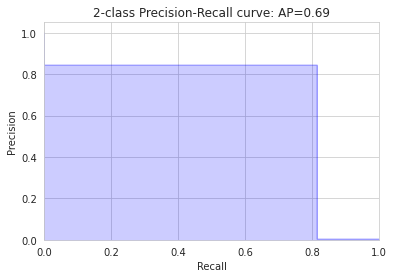

auc roc score:  0.972386276776702
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.82      0.83       147

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85274    22]
 [   27   120]]


In [60]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the model with balanced subsample
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=10, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=20, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
y_predicted = model.predict(X_test)

# Calculate probs
probs = model.predict_proba(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the roc auc score, the classification report and confusion matrix
print("auc roc score: ", roc_auc_score(y_test, probs[:,1]))
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_test, y_predicted))


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


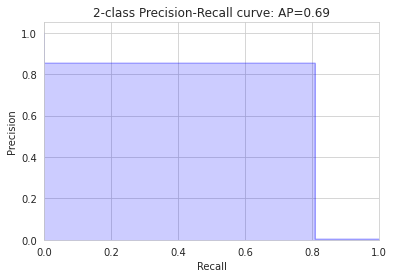

roc_auc_score: 0.9783260964299432
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.81      0.83       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
 [[85276    20]
 [   28   119]]


In [62]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Build a RandomForestClassifier using the GridSearchCV parameters
rfc = RandomForestClassifier(bootstrap=True,
                               class_weight = {0:1,1:12},
                               criterion = 'entropy',
                               n_estimators = 30,
                               max_features = 'auto',
                               min_samples_leaf = 10,
                               max_depth = 8,
                               n_jobs = -1,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the roc_auc_score,Classifcation report and Confusin matrix
probs = rfc.predict_proba(X_test)
print('roc_auc_score:', roc_auc_score(y_test,probs[:,1]))
print('Classification report:\n',classification_report(y_test,y_predicted))
print('Confusion_matrix:\n',confusion_matrix(y_test,y_predicted))

#### With hyperparameter tuning in case of Random Forest we are getting ROC AUC score of 0.97 and 0.93 without hyper parameter tuning

### Checking for feature importance in case of Random Forest

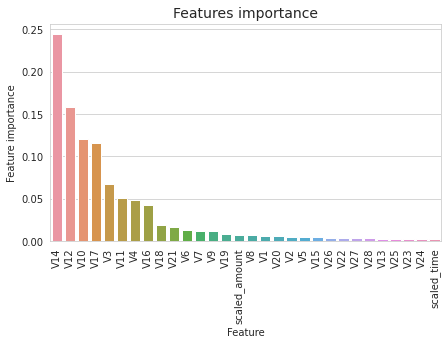

In [64]:
tmp = pd.DataFrame({'Feature': cols, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

## Model 4: K-Nearest Neighbors Algorithm

In [65]:
# Split the data into train set and test set
train,test = train_test_split(df,test_size=0.3,random_state=0)

# Get the arrays of features and labels in train dataset
features_train = train.drop(['Time','Class'],axis=1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

# Get the arrays of features and labels in test dataset
features_test = test.drop(['Time','Class'],axis=1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(features_train)    
x_test= st_x.transform(features_test)  

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier.fit(x_train, labels_train)  
y_predicted= classifier.predict(x_test)  

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [67]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(labels_test, y_predicted)
cm

array([[85288,     8],
       [   37,   110]])

In [68]:
y_predicted.shape

(85443,)

We can detect 110 out of 147 fraud cases in the test dataset.
But there are 8 false positive cases which indicated that our KMeans model is performing well.

ROC AUC Score: 0.9182719209424531
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.75      0.83       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85288     8]
 [   37   110]]


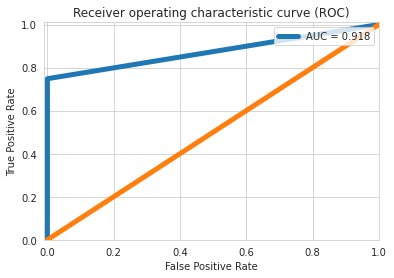

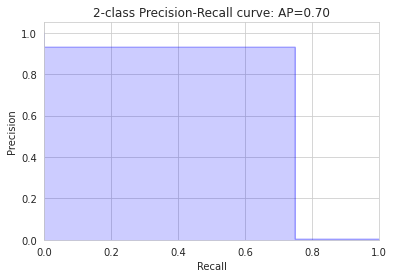

In [69]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(labels_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = classifier.predict_proba(x_test)
roc_auc = roc_auc_score(labels_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(labels_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(labels_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(labels_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = labels_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

## Model 5: XGBoost Algorithm

In [ ]:
pip install xgboost

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.2,
                                                                    stratify=y,
                                                                    shuffle=True,
                                                                    random_state=0)
import xgboost as xgb
from sklearn import metrics

xgclf = xgb.XGBClassifier()

xgclf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[14:14:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclf.predict_proba(X_train)[:, 1]))

AUC on train data by XGBoost = 1.0


In [14]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test)[:, 1]))

AUC on test data by XGBoost = 0.9864852982554868


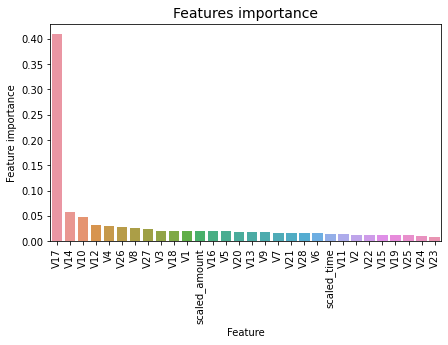

In [18]:
tmp = pd.DataFrame({'Feature': cols, 'Feature importance': xgclf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

plt.show() 

Most important features are V17, V14, V10. V12 and V4 

## XGBoost Claasifier on resampled data

In [36]:
# Create the training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Resample your training data
rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train,y_train)

# Fit a logistic regression model to our data
rus_model = xgb.XGBClassifier().fit(X_train_rus, y_train_rus)
ros_model = xgb.XGBClassifier().fit(X_train_ros, y_train_ros)
smote_model = xgb.XGBClassifier().fit(X_train_smote, y_train_smote)
adasyn_model = xgb.XGBClassifier().fit(X_train_adasyn, y_train_adasyn)

y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_adasyn = adasyn_model.predict(X_test)


print('Classifcation report:\n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_adasyn))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_adasyn))
print('*'*25)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:13:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

F1 score for ADASYN is 0.79 and is better than other resampling technique in this case

## XGBoost with Hyperparameter Tuning

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
xgb_model = xgb.XGBClassifier()
parameters = {'learning_rate': [0.1, 0.5],
              'max_depth': [4, 10],
              'min_child_weight': [3, 7, 11]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)


clf_xgb.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [38]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 7}
0.9864541694970291
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [38]:
model = xgb.XGBClassifier(learning_rate= 0.1, max_depth=10,
                          min_child_weight= 7,
                               n_jobs = 4,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

[01:50:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC AUC Score: 0.9795119827615909
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56859     5]
 [   25    73]]


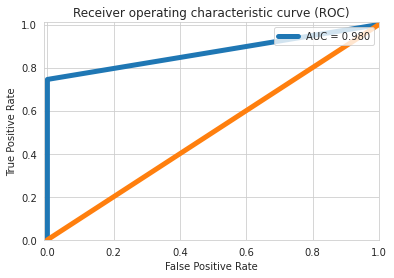

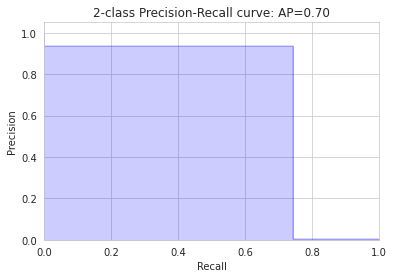

In [47]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
parameters = {'learning_rate': [0.1],
              'max_depth': [8, 10, 15],
              'min_child_weight': [7],
              'max_features': [5, 10, 15],
              'min_samples_split': [500, 1000],
              'min_samples_leaf': [5, 10],
              'bootstrap': [True, False],
              'criterion': ["gini", "entropy"]
             }

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)


clf_xgb.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[07:33:08] WARNING: ../src/learner.cc:541: 
Parameters: { bootstrap, criterion, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:33:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'bootstrap': [True, Fal

In [43]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.1}
0.9796094554453324
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [45]:
model = xgb.XGBClassifier(learning_rate= 0.1, max_depth=6,
                          min_child_weight= 1,
                               n_jobs = 4,min_child_weight=1,
                               random_state = 5)
​
# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

SyntaxError: invalid character in identifier (<ipython-input-45-d7766a48d13d>, line 5)

In [ ]:
As we can see ROC AUC score is 98.6 without hyperparameter tuning and with hyperparameter tuning there is score of 0.9796, thus hyperparameter tuning is not of much help.


## Conclusion

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models. The data was split in 3 parts, a train set, a validation set and a test set. For the Logistic Regression and KNN models, we only used the train and test set.

We started with Logistic Regression, for which we obtained an AUC scode of 0.978 when predicting the target for the test set.

We followed with an Decision Tree model, with lower AUC score (0.877) for prediction of the test set target values.

We then followed with an KNN, with the AUC score after training we got AUC score of 0.9182.

And then after KNN, we used Random Forest Classifier and we got AuC score of  0.9337 and with some hyper parameter tuning we were able to achieve 0.972 AUC score.

And at last we used XGBoost Claasifier by which we were able to achieve AUC score of 0.9864 and with hyper parameter tuning we got AUC score of 0.9796, thus we can see that hyper parameter tuning is not helpful in this case.
In this case, se used the validation set for validation of the training model. The best validation score obtained was 0.984. Then we used the model with the best training step, to predict target value from the test data; the AUC score obtained was 0.974.

We have also used resampling techniques like SMOTE , ADASYN , Over Sampling and under sampling, since the data was highly imbalanced
We have used power transform to make data more Gaussian.